<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Daily_Challenge_W6D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faker

In [3]:
import numpy as np
import pandas as pd
from faker import Faker

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Initialize Faker
fake = Faker()

In [10]:
# Generate city names
cities = [fake.city() for _ in range(10)]
cities

['Wilsonstad',
 'Lake Tiffany',
 'East Olivia',
 'East Mariaview',
 'Brookschester',
 'Nicholeside',
 'North Ryantown',
 'Mitchellland',
 'Robertsview',
 'Williamstown']

In [6]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November','December']

In [13]:
# Generate temperature data for 10 cities across 12 months
temperature = np.random.uniform(-5, 35, (10, 12)).astype(int)
temperature

array([[21, -2, 29,  2, 21,  1, 16, 17, 28,  0, -4,  4],
       [-3,  4,  6,  1,  6, 24, 30,  5,  0, -4, 33, 21],
       [20, 31, 19, -1, 26, 30, 14,  9, -4,  4, 25,  4],
       [ 7, 25, 26,  3, 16,  7, 23,  0, -3, 32, 14, 19],
       [18,  1, 27, -2, 17, 13,  9, 16,  5,  4, 23, 27],
       [10, 25, -3, 11, 29, 18, 22,  0, 19,  6,  5, -3],
       [14,  4, 15, 13, 34,  6, 25, 25, -4, 19, 21, 27],
       [32, 12, 17, 17,  3, 30,  0,  9,  3, 28,  3,  4],
       [18,  1, 20, 16, -1,  0, -2, 21, 31, -2, -1, 18],
       [28, -3, 22, -4,  0, 13,  4, 16,  2, 21, 20,  1]])

In [14]:
temperature_df = pd.DataFrame(data=temperature, index=cities, columns=months)
temperature_df

,January,February,March,April,May,June,July,August,September,October,November,December
Wilsonstad,21,-2,29,2,21,1,16,17,28,0,-4,4
Lake Tiffany,-3,4,6,1,6,24,30,5,0,-4,33,21
East Olivia,20,31,19,-1,26,30,14,9,-4,4,25,4
East Mariaview,7,25,26,3,16,7,23,0,-3,32,14,19
Brookschester,18,1,27,-2,17,13,9,16,5,4,23,27
Nicholeside,10,25,-3,11,29,18,22,0,19,6,5,-3
North Ryantown,14,4,15,13,34,6,25,25,-4,19,21,27
Mitchellland,32,12,17,17,3,30,0,9,3,28,3,4
Robertsview,18,1,20,16,-1,0,-2,21,31,-2,-1,18
Williamstown,28,-3,22,-4,0,13,4,16,2,21,20,1


In [22]:
annual_average_temp_city = temperature_df.mean(axis=1)
annual_average_temp_city

Wilsonstad        11.083333
Lake Tiffany      10.250000
East Olivia       14.750000
East Mariaview    14.083333
Brookschester     13.166667
Nicholeside       11.583333
North Ryantown    16.583333
Mitchellland      13.166667
Robertsview        9.916667
Williamstown      10.000000
dtype: float64

In [23]:
annual_average_temp_month = temperature_df.mean(axis=0)
annual_average_temp_month

January      16.5
February      9.8
March        17.8
April         5.6
May          15.1
June         14.2
July         14.1
August       11.8
September     7.7
October      10.8
November     13.9
December     12.2
dtype: float64

In [24]:
hottest_city = annual_average_temp_city.idxmax()
hottest_city

'North Ryantown'

In [26]:
coldest_city = annual_average_temp_city.idxmin()
coldest_city

'Robertsview'

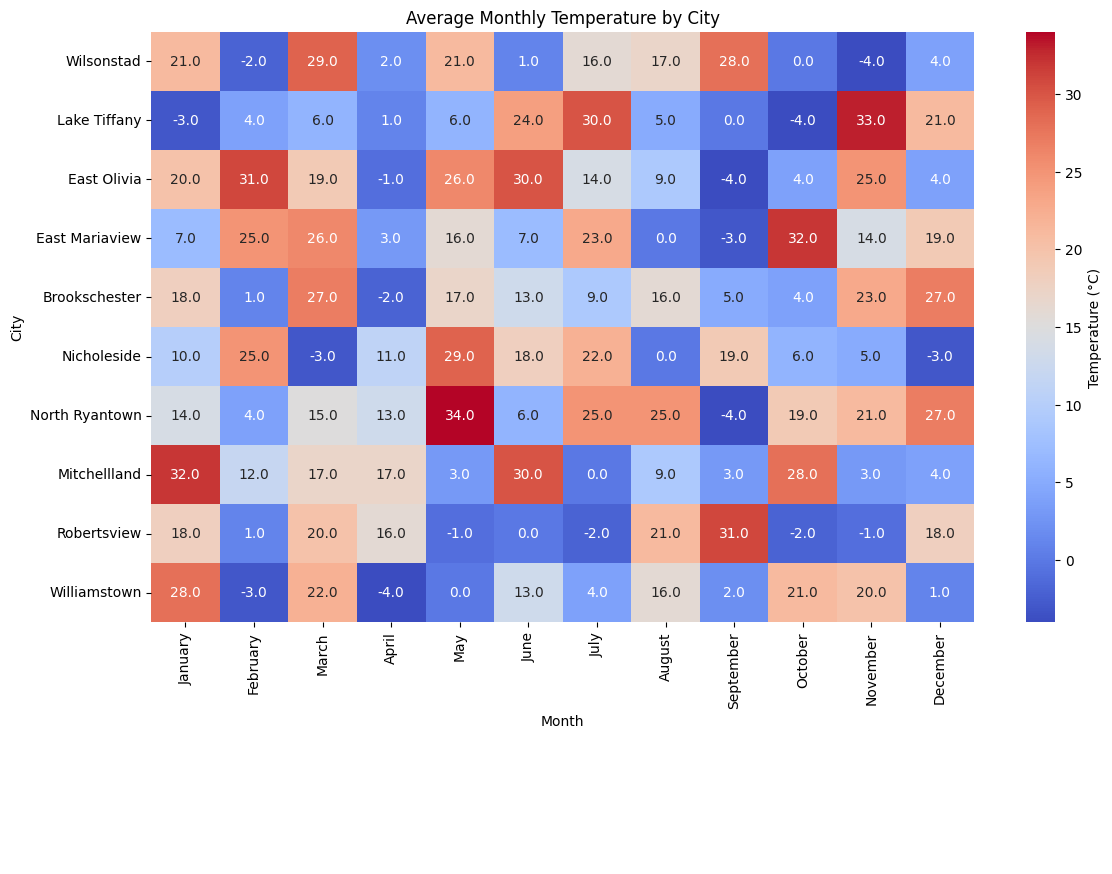

In [28]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(temperature_df, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Temperature (°C)'})
plt.title('Average Monthly Temperature by City')
plt.xlabel('Month')
plt.ylabel('City')
plt.annotate(f'Hottest City: {hottest_city}', xy=(0.5, 0), xytext=(0, -30),
             xycoords=('axes fraction', 'figure fraction'), textcoords='offset points',
             fontsize=10, ha='center', va='bottom', color='red')
plt.annotate(f'Coldest City: {coldest_city}', xy=(0.5, 0), xytext=(0, -50),
             xycoords=('axes fraction', 'figure fraction'), textcoords='offset points',
             fontsize=10, ha='center', va='bottom', color='blue')
plt.tight_layout()
plt.show()

In [31]:
# Reshape the DataFrame for plotting
df_avg_temp = temperature_df.stack().reset_index()
df_avg_temp.columns = ['City', 'Month', 'Temperature']
df_avg_temp

,City,Month,Temperature
0,Wilsonstad,January,21
1,Wilsonstad,February,-2
2,Wilsonstad,March,29
3,Wilsonstad,April,2
4,Wilsonstad,May,21
...,...,...,...
115,Williamstown,August,16
116,Williamstown,September,2
117,Williamstown,October,21
118,Williamstown,November,20


<ipython-input-39-195a88135d0d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_avg_temp, x='Month', y='Temperature', palette='Set2')


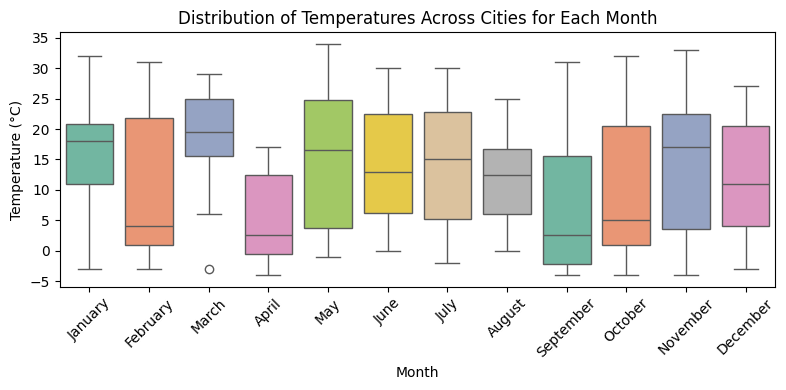

In [39]:
# Box Plot: Distribution of temperatures across different cities for each month
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_avg_temp, x='Month', y='Temperature', palette='Set2')
plt.title('Distribution of Temperatures Across Cities for Each Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

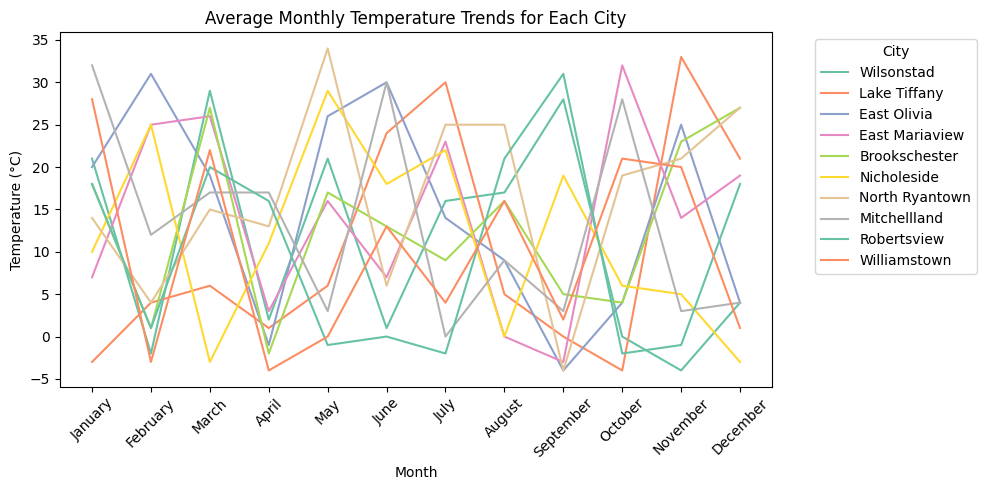

In [41]:
# Line Plot: Average temperature trends for each city over the months
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_avg_temp, x='Month', y='Temperature', hue='City', palette='Set2')
plt.title('Average Monthly Temperature Trends for Each City')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

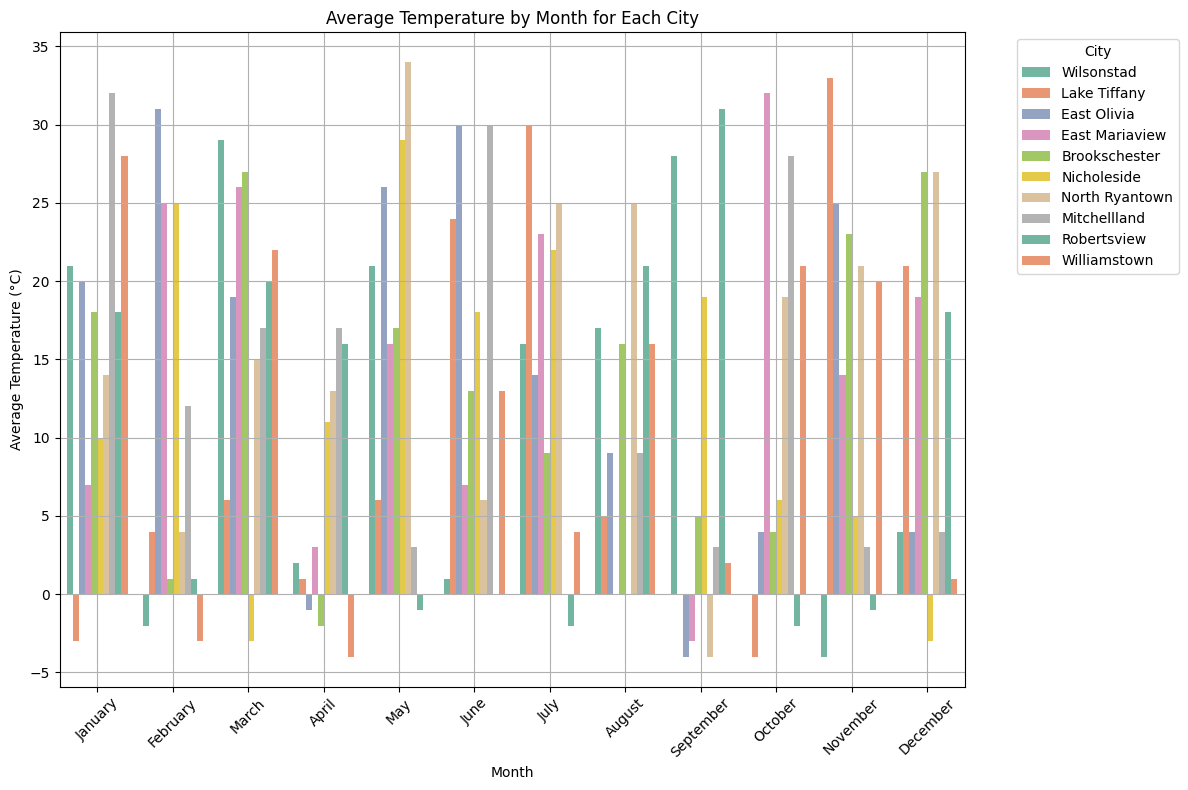

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_avg_temp, x='Month', y='Temperature', hue='City', palette='Set2')
plt.title('Average Temperature by Month for Each City')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

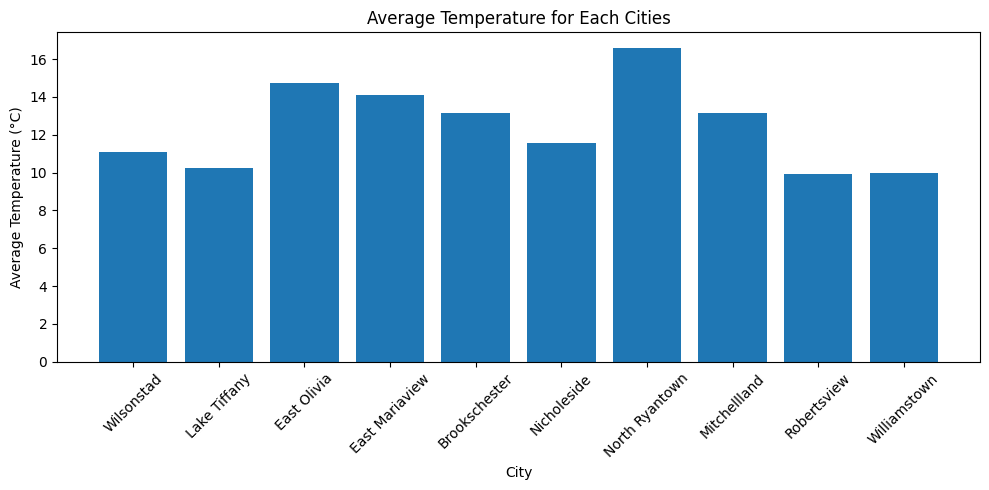

In [56]:
# Bar Plot: Average temperature for each month across all cities
plt.figure(figsize=(10, 5))
plt.bar(annual_average_temp_city.index, annual_average_temp_city)
plt.title('Average Temperature for Each Cities')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

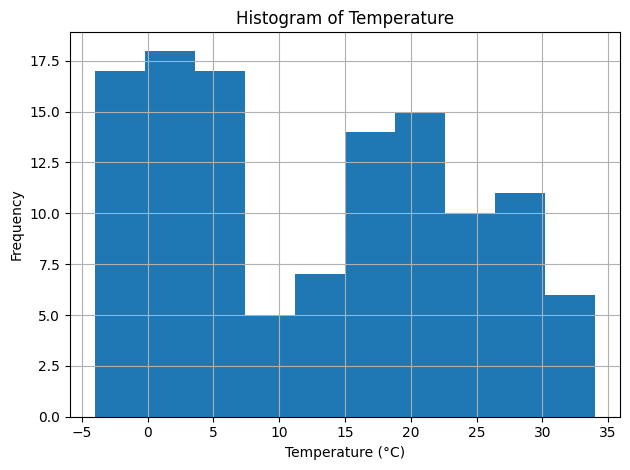

In [58]:
plt.figure(figsize=(12, 6))
df_avg_temp.hist()
plt.title('Histogram of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

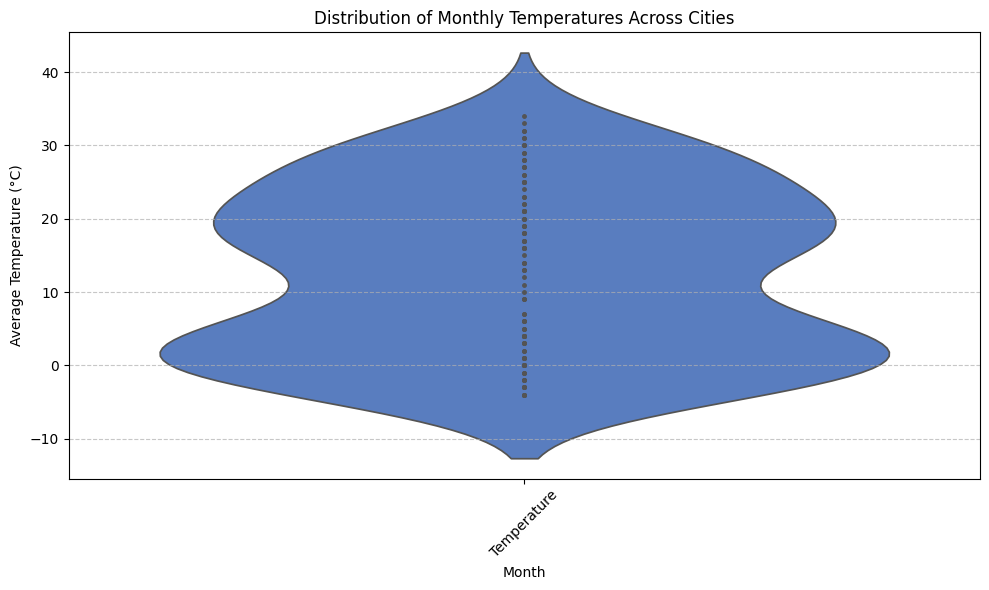

In [60]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_avg_temp, inner="points", palette="muted")
plt.title('Distribution of Monthly Temperatures Across Cities')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()